In [908]:
print("Linear Regression")

Linear Regression


In [909]:
def parse_file(filepath: str):
    mileage = []
    price = []
    
    with open(filepath, 'r') as file:
        file.readline() # remove headers
        for line in file.readlines():
            parsed_line = line.split(",")
            mileage.append(float(parsed_line[0]))
            price.append(float(parsed_line[1]))
            
    return mileage, price

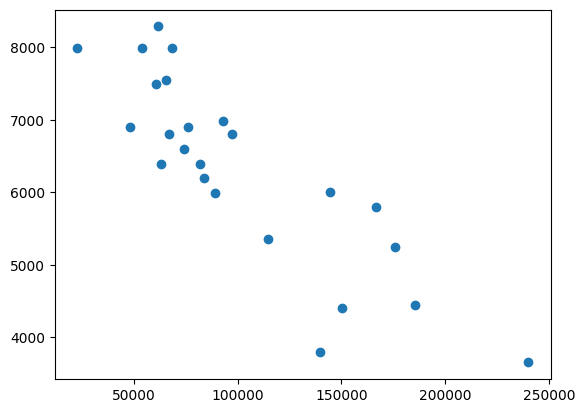

In [910]:
import matplotlib.pyplot as plt

x, y = parse_file("data.csv")
plt.scatter(x, y)
plt.show()

In [911]:
def estimate_price(mileage: float, theta_0: float, theta_1: float):
    price = theta_0 + mileage * theta_1
    return price

In [912]:
def summation(array: list):
    sum = 0
    for element in array:
        sum += element
    return sum

In [913]:
def mean(array: list):
    return summation(array) / len(array)

In [914]:
import math
def variance(array: list):
    m = mean(array)
    return summation([(element - m) ** 2 for element in array]) / len(array)

In [915]:
import math

def standardization(array: list):
    m = mean(array)
    std = math.sqrt(variance(array))
    std_array = [(element - m) / std for element in array]
    return std_array

In [916]:
def descent_gradient(x: list, y: list, epoch: int = 10, learning_rate: float = 0.1, epsilon: float = 0.01, theta_0: float = 0.0, theta_1: float = 0.0):
    std_x = standardization(x)
    convergence = 0
    errors_theta_0 = []
    errors_theta_1 = []
    steps = epoch
    for i in range(epoch):

        # calculate the error on theta_0 and theta_1
        diff_prices = [estimate_price(mileage, theta_0, theta_1) - price for mileage, price in zip(std_x,y)]
        diff_prices_mil = [(estimate_price(mileage, theta_0, theta_1) - price) * mileage for mileage, price in zip(std_x,y)]
        tmp_theta_0 = summation(diff_prices) / len(x) * learning_rate
        tmp_theta_1 = summation(diff_prices_mil) / len(x) * learning_rate

        # store the error on theta_0 and theta_1
        errors_theta_0.append(abs(tmp_theta_0))
        errors_theta_1.append(abs(tmp_theta_1))

        # calculate convergence interval when the function doesn't converge
        if (convergence == 0):
            epsilon_theta_0 = abs(epsilon * theta_0)
            theta_0_min = theta_0 - epsilon_theta_0
            theta_0_max = theta_0 + epsilon_theta_0
            epsilon_theta_1 = abs(epsilon * theta_1)
            theta_1_min = theta_1 - epsilon_theta_1
            theta_1_max = theta_1 + epsilon_theta_1

        # update theta_0 and theta_1 removing the error calculated previously
        theta_0 = theta_0 - tmp_theta_0
        theta_1 = theta_1 - tmp_theta_1

        # if the theta_0 and theta_1 converge update the convergence param else reset it
        if ( (theta_0_min < theta_0 < theta_0_max) and (theta_1_min < theta_1 < theta_1_max)):
            convergence += 1
        else:
            convergence = 0

        # if the theta_0 and theta_1 have converged then exit
        if (convergence >= 10):
            steps = i + 1
            break
    
    # standardize errors
    max_error_theta_0 = max(errors_theta_0)
    max_error_theta_1 = max(errors_theta_1)
    errors_theta_0 = [error_theta_0 / max_error_theta_0 for error_theta_0 in errors_theta_0]
    errors_theta_1 = [error_theta_1 / max_error_theta_1 for error_theta_1 in errors_theta_1]

    # plot theta_0 and theta_1 errors
    errors_x = range(1, steps + 1)
    plt.plot(errors_x, errors_theta_0, "r-", label="theta_0")
    plt.plot(errors_x, errors_theta_1, "b--", label="theta_1")
    plt.legend(loc="upper right")
    plt.xlabel("steps")
    plt.ylabel("error")
    plt.title("Error evolution")
    plt.show()
    print(f"The function converged in {steps} steps")
    return theta_0, theta_1

In [917]:
def reverse_standardization(x: list, theta_0, theta_1):
    x_mean = mean(x)
    x_sigma = math.sqrt(variance(x))
    new_theta_0 = theta_0 - theta_1 * x_mean / x_sigma
    new_theta_1 = theta_1 / x_sigma
    return new_theta_0, new_theta_1

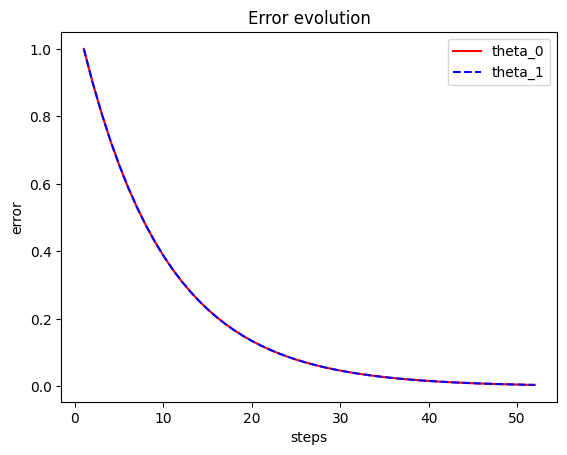

The function converged in 52 steps
theta_0: 8464.11757891536
theta_1: -0.021359423650909187


In [918]:
theta_0, theta_1 = descent_gradient(x, y, 10000, 0.1)
theta_0, theta_1 = reverse_standardization(x, theta_0, theta_1)

print(f"theta_0: {theta_0}")
print(f"theta_1: {theta_1}")

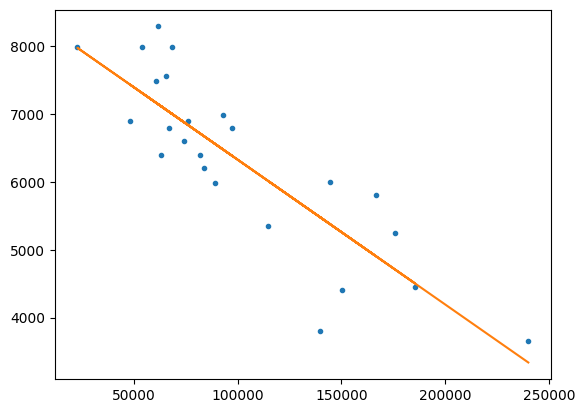

In [919]:
plt.plot(x, y, ("."), x, [estimate_price(mileage, theta_0, theta_1) for mileage in x], ("-"))
plt.show()